Partie 1 : Preprocessing des données 
Phase de nettoyage des différents tableaux de données (PIB, PIB/hab, IDH, score, Dépenses) et mise sous le même format afin d'aboutir à "df_merged_final2", la table netoyée et fusionnant toutes les sources de données. 

In [152]:
import sys
sys.path.append("../Scriptsfinal")  # dossier contenant tous tes scripts
import importlib
import medals
import pib_eu
import depenses
import Visu3
import Reg3
import merge_data
import Prepro3


importlib.reload(medals)
importlib.reload(pib_eu)
importlib.reload(depenses)
importlib.reload(Visu3)
importlib.reload(Reg3)
importlib.reload(merge_data)
importlib.reload(Prepro3)


# Importer les fonctions ou variables de chaque script
from medals import process_medals         # df_all_games, df_score
from pib_eu import process_pib_eu         # df_PIB_long
from pib_world import process_pib_world   # df_PIB_hab
from idh import process_idh               # df_IDH
from merge_data import merge_all           # df_merged_final2
from depenses import process_depenses     # df_merged_final avec dépenses
from Visu3 import plot_score_vs_spending
from Reg3 import run_ols





In [153]:
df_all_games, df_score, df_athlete = process_medals()

df_score.head(10)

,Year,Team,Score
0,1896,Australia,10
1,1896,Australia/Great Britain,1
2,1896,Austria,14
3,1896,Denmark,12
4,1896,Ethnikos Gymnastikos Syllogos,1
5,1896,France,35
6,1896,Germany,42
7,1896,Great Britain,18
8,1896,Great Britain/Germany,5
9,1896,Greece,98


In [154]:


df_PIB_long = process_pib_eu()
df_PIB_long.head(20)


/opt/homebrew/anaconda3/lib/python3.12/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: Données!$1:$1048576.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


,Team,Country Code,Year,PIB
0,Austria,AUT,2016,318.0072
1,Belgium,BEL,2016,381.1002
2,Spain,ESP,2016,1213.8740
3,Estonia,EST,2016,29.2015
4,Finland,FIN,2016,170.1131
5,France,FRA,2016,1987.5494
6,Ireland,IRL,2016,241.5633
7,Italy,ITA,2016,1690.5546
8,Lithuania,LTU,2016,61.5078
9,Austria,AUT,2021,359.7171


In [155]:
df_PIB_hab = process_pib_world()
df_PIB_hab.head(10)

,Country Name,Country Code,JO Year,PIB_mean
0,Aruba,ABW,2012,25778.051271
1,NaN,AFE,2012,1536.255359
2,Afghanistan,AFG,2012,500.275781
3,NaN,AFW,2012,1657.933736
4,Angola,AGO,2012,3863.241475
5,Albanie,ALB,2012,4331.752197
6,Andorre,AND,2012,45627.880286
7,Le monde arabe,ARB,2012,6012.220713
8,Émirats arabes unis,ARE,2012,45585.739560
9,Argentine,ARG,2012,10014.690007


In [156]:
df_IDH = process_idh()
df_IDH.head(10)



,Country,Year_IDH,HDI,Year
0,Very high human development,1990,NaN,1996.0
1,Iceland,1990,0.841,1996.0
2,Norway,1990,0.856,1996.0
3,Switzerland,1990,0.858,1996.0
4,Denmark,1990,0.844,1996.0
5,Germany,1990,0.834,1996.0
6,Sweden,1990,0.818,1996.0
7,Australia,1990,0.867,1996.0
8,"Hong Kong, China (SAR)",1990,0.755,1996.0
9,Netherlands,1990,0.855,1996.0


In [157]:
df_depenses = process_depenses()
df_depenses.head(10)

,Country,Year,Dépenses
0,Germany,2015,2.0
1,Germany,2016,2.0
2,Germany,2017,2.0
3,Germany,2018,2.0
4,Germany,2019,2.0
5,Germany,2020,2.2
6,Germany,2021,2.0
7,Germany,2022,2.0
8,Germany,2023,2.0
9,Austria,2015,2.5


In [ ]:
df_merged_final2 = merge_all(df_score, df_PIB_hab, df_IDH, df_depenses)
df_merged_final2.head(20)


,Year,Country,Score,Country Code,PIB_mean,HDI,Dépenses
0,2016,Austria,1.0,AUT,48446.490194,0.919,2.5
1,2016,Belgium,16.0,BEL,45182.087207,0.933,2.7
2,2016,Bulgaria,4.0,BGR,7641.548332,0.824,2.0
3,2016,Denmark,29.0,DNK,58858.958276,0.943,3.6
4,2016,Estonia,1.0,EST,18795.636738,0.888,4.1
5,2016,Finland,1.0,FIN,47469.202591,0.938,3.1
6,2016,France,100.0,FRA,40845.809814,0.901,2.9
7,2016,Germany,115.0,DEU,45709.422975,0.948,2.0
8,2016,Greece,19.0,GRC,20663.286641,0.888,1.7
9,2016,Hungary,50.0,HUN,13456.266151,0.847,6.6


Phase 2 : Statistiques descriptives et réponse à notre problématique par des régressions et corrélations diverses

2.1 : Statistiques descriptives

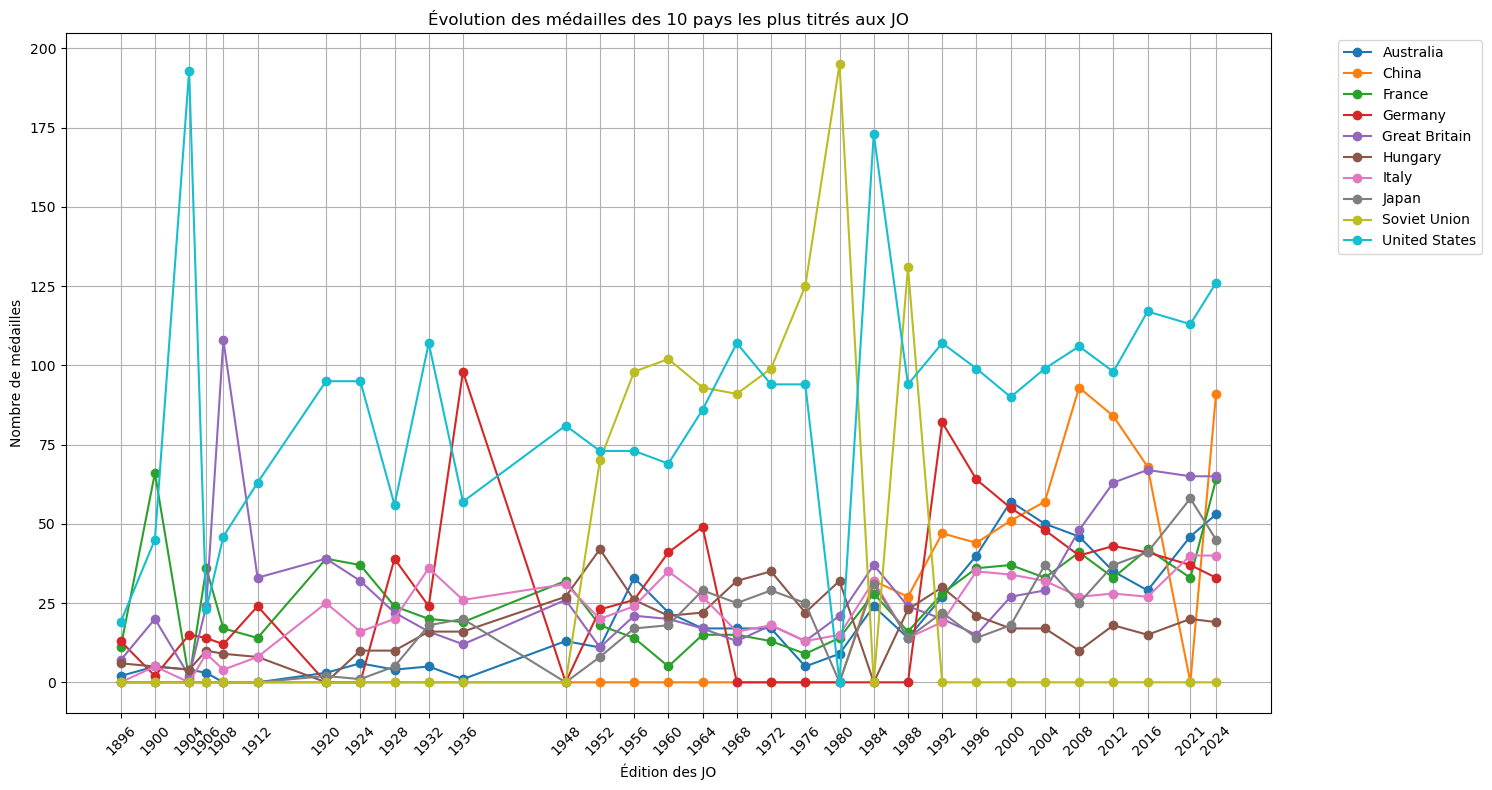

In [159]:
from Visu3 import plot_top_countries_medals
plot_top_countries_medals(df_all_games, top_n = 10) #top_n correspond au nombre de pays représentés en partant du meilleur


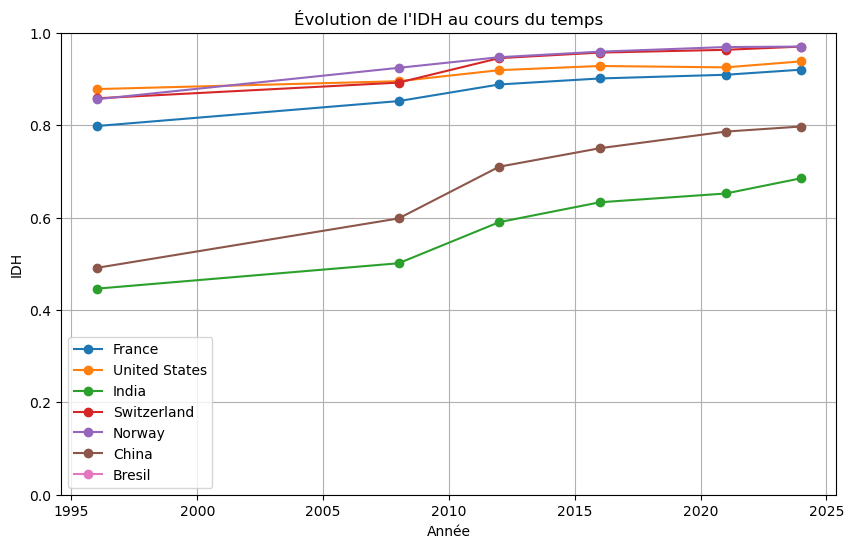

In [160]:

from Visu3 import plot_hdi_over_time
countries = ["France", "United States", "India", "Switzerland", "Norway", "China", "Bresil"]
plot_hdi_over_time(df_IDH, countries)


2.2 : Analyse détaillée et premiers résultats de régression

Dans cette section, nous affinons encore notre dataframe en lui ajoutant deux variables (Taille de la délégation et score précédent), afin de procéder à différentes régressions. 

In [161]:
import sys
sys.path.append("../Scriptsfinal")


import data_loading
import features
importlib.reload(data_loading)
importlib.reload(features)

from data_loading import clean_main_df, add_us_data
from features import add_previous_score, add_delegation_size
from Reg3 import correlation_analysis, run_ols, train_test_validation, add_lagged_depenses, run_2sls
from Visu3 import scatter_controls, plot_regression_results



In [162]:

df = clean_main_df(df_merged_final2)
df = add_us_data(df)
df.head()


,Year,Country,Score,Country Code,PIB_mean,HDI,Dépenses
0,2016,Austria,1.0,AUT,48446.490194,0.919,2.5
1,2016,Belgium,16.0,BEL,45182.087207,0.933,2.7
2,2016,Bulgaria,4.0,BGR,7641.548332,0.824,2.0
3,2016,Denmark,29.0,DNK,58858.958276,0.943,3.6
4,2016,Estonia,1.0,EST,18795.636738,0.888,4.1


In [164]:
df = add_previous_score(df, df_score)
df_Reg = add_delegation_size(df, df_athlete)
df_Reg.head(10)


,Year,Country,Score,Country Code,PIB_mean,HDI,Dépenses,score_précédent,taille_délégation
0,2016,Austria,1.0,AUT,48446.490194,0.919,2.5,11.666667,2.0
1,2016,Belgium,16.0,BEL,45182.087207,0.933,2.7,6.000000,21.0
4,2016,Estonia,1.0,EST,18795.636738,0.888,4.1,4.666667,4.0
5,2016,Finland,1.0,FIN,47469.202591,0.938,3.1,5.666667,1.0
6,2016,France,100.0,FRA,40845.809814,0.901,2.9,86.000000,93.0
9,2016,Hungary,50.0,HUN,13456.266151,0.847,6.6,45.333333,15.0
10,2016,Ireland,4.0,IRL,55905.258420,0.931,1.2,5.333333,3.0
11,2016,Italy,70.0,ITA,34306.075480,0.889,1.6,73.333333,69.0
12,2016,Lithuania,5.0,LTU,15160.169828,0.869,2.0,10.000000,7.0
14,2016,Norway,4.0,NOR,94551.605105,0.959,3.6,21.666667,19.0


In [165]:

corr_simple, corr_hdi, corr_pib = correlation_analysis(df_Reg)
print(f"Corrélation simple entre Score et Dépenses (% PIB) : {corr_simple:.3f}")
print(f"Corrélation partielle Score-Dépenses contrôlant pour HDI : {corr_hdi:.3f}")
print(f"Corrélation partielle Score-Dépenses contrôlant pour PIB/hab : {corr_pib:.3f}")



Corrélation simple entre Score et Dépenses (% PIB) : -0.407
Corrélation partielle Score-Dépenses contrôlant pour HDI : -0.397
Corrélation partielle Score-Dépenses contrôlant pour PIB/hab : -0.355


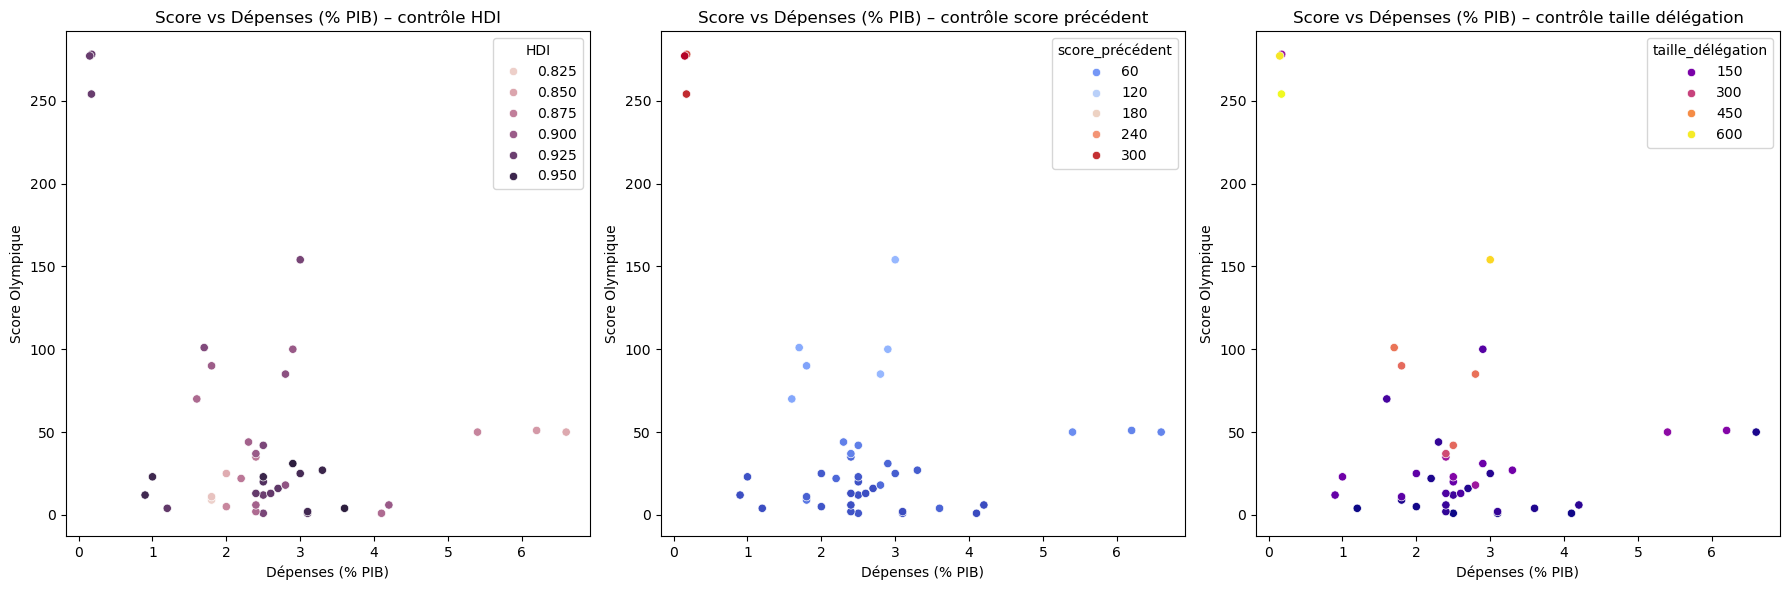

In [166]:
scatter_controls(df_Reg)


Analyse des régressions afin d'observer la corrélation entre le score et les dépenses (% du PIB) contrôlée par des variables sensées avoir un impact positif sur les performances aux JO

In [167]:
df1 = df_Reg[df_Reg["Year"] == 2016]
model = run_ols(df1, ['Dépenses', 'HDI', 'score_précédent', 'taille_délégation'])
display(model.summary())

/opt/homebrew/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     247.0
Date:                Mon, 29 Dec 2025   Prob (F-statistic):           6.01e-10
Time:                        22:03:32   Log-Likelihood:                -50.298
No. Observations:                  15   AIC:                             110.6
Df Residuals:                      10   BIC:                             114.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -23.1252     58.899     -0.393      0.703    -154.359     108.109
Dépenses              3.4184      1.784      1.916      0.084      -0.556       7.393
HDI                   9.4630     64.642      0.146      0.887    -134.569     153.495
score_précédent       0.5883      0.159      3.702      0.004       0.234       0.942
taille_délégation     0.5834      0.210      2.780      0.019       0.116       1.051
==============================================================================
Omnibus:                        7.283   Durbin-Watson:                   2.666
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                4.067
Skew:                          -1.179   Prob(JB):                        0.131
Kurtosis:                       3.974   Cond. No.                     4.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [168]:
print("=== OLS avec USA ===")
model_full = run_ols(df_Reg, ['Dépenses', 'HDI', 'score_précédent', 'taille_délégation'])
display(model_full.summary())

print("\n=== OLS sans USA ===")
df_no_usa = df_Reg[df_Reg['Country'] != 'United States']
model_no_usa = run_ols(df_no_usa, ['Dépenses', 'HDI', 'score_précédent', 'taille_délégation'])
display(model_no_usa.summary())



=== OLS avec USA ===


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     242.7
Date:                Mon, 29 Dec 2025   Prob (F-statistic):           5.29e-26
Time:                        22:03:35   Log-Likelihood:                -168.34
No. Observations:                  42   AIC:                             346.7
Df Residuals:                      37   BIC:                             355.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -57.6448     61.450     -0.938      0.354    -182.155      66.866
Dépenses              1.7836      1.896      0.941      0.353      -2.058       5.625
HDI                  59.3009     65.967      0.899      0.374     -74.362     192.963
score_précédent       0.8358      0.043     19.243      0.000       0.748       0.924
taille_délégation     0.0551      0.018      2.994      0.005       0.018       0.092
==============================================================================
Omnibus:                       10.096   Durbin-Watson:                   2.293
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               11.360
Skew:                           0.779   Prob(JB):                      0.00341
Kurtosis:                       5.017   Cond. No.                     9.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


=== OLS sans USA ===


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     78.88
Date:                Mon, 29 Dec 2025   Prob (F-statistic):           1.02e-16
Time:                        22:03:35   Log-Likelihood:                -147.38
No. Observations:                  39   AIC:                             304.8
Df Residuals:                      34   BIC:                             313.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -88.1928     51.851     -1.701      0.098    -193.566      17.181
Dépenses              0.8707      1.581      0.551      0.586      -2.343       4.084
HDI                  90.3012     55.854      1.617      0.115     -23.208     203.810
score_précédent       1.0174      0.103      9.880      0.000       0.808       1.227
taille_délégation     0.0568      0.019      2.949      0.006       0.018       0.096
==============================================================================
Omnibus:                        3.860   Durbin-Watson:                   2.398
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                3.319
Skew:                          -0.174   Prob(JB):                        0.190
Kurtosis:                       4.386   Cond. No.                     7.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [169]:
res = train_test_validation(df_Reg[df_Reg['Country'] != 'United States'],
                            ['Dépenses', 'PIB_mean', 'score_précédent', 'taille_délégation'])

print("Validation train-test sur l'échantillon sans USA :")
print(f"R² = {res['R2']:.3f}, MSE = {res['MSE']:.3f}")
print(f"Coefficient de Dépenses estimé : {res['coef_depenses']:.3f}")



Validation train-test sur l'échantillon sans USA :
R² = 0.849, MSE = 337.776
Coefficient de Dépenses estimé : 0.954


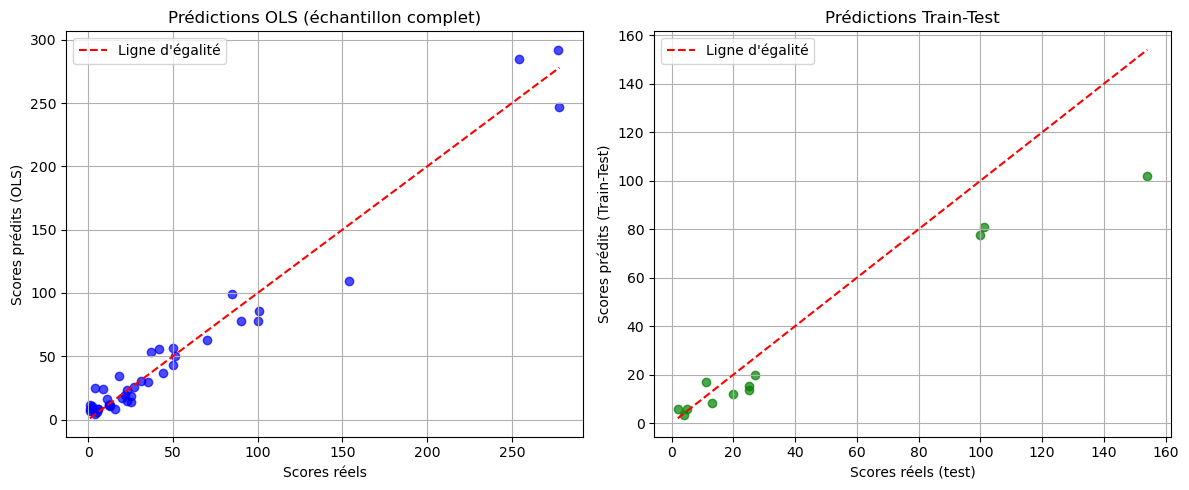

In [170]:
plot_regression_results(
    y_full = df_Reg['Score'],
    fitted_full = model_full.fittedvalues,
    y_test = res['y_test'],
    y_pred = res['y_pred']
)


In [171]:
# On ajoute les dépenses passées
df2sls = add_lagged_depenses(df_Reg.copy())

# Double MCO
first_stage, second_stage = run_2sls(df2sls)


print("\nPremière étape 2SLS :")
display(first_stage.summary())

print("\nDeuxième étape 2SLS :")
display(second_stage.summary())

# Comparaison avec OLS
print(f"\nComparaison : Coef Dépenses OLS = {model_full.params['Dépenses']:.3f}, 2SLS = {second_stage.params['Depenses_hat']:.3f}")


⚠ 15 lignes n'ont pas de Depenses_lag et seront ignorées.

Première étape 2SLS :


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Dépenses   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     227.5
Date:                Mon, 29 Dec 2025   Prob (F-statistic):           1.49e-17
Time:                        22:03:43   Log-Likelihood:                 5.5982
No. Observations:                  27   AIC:                            -1.196
Df Residuals:                      22   BIC:                             5.283
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.5425      1.244      1.240      0.228      -1.037       4.122
Depenses_lag          0.8751      0.034     25.539      0.000       0.804       0.946
HDI                  -1.3546      1.330     -1.018      0.320      -4.114       1.404
score_précédent      -0.0019      0.001     -1.864      0.076      -0.004       0.000
taille_délégation     0.0004      0.000      1.028      0.315      -0.000       0.001
==============================================================================
Omnibus:                        0.394   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.821   Jarque-Bera (JB):                0.068
Skew:                          -0.123   Prob(JB):                        0.967
Kurtosis:                       3.008   Cond. No.                     1.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


Deuxième étape 2SLS :


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     204.5
Date:                Mon, 29 Dec 2025   Prob (F-statistic):           4.67e-17
Time:                        22:03:43   Log-Likelihood:                -103.63
No. Observations:                  27   AIC:                             217.3
Df Residuals:                      22   BIC:                             223.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -62.9093     72.372     -0.869      0.394    -213.001      87.182
Depenses_hat          1.6747      2.238      0.748      0.462      -2.966       6.315
HDI                  59.1161     76.940      0.768      0.450    -100.448     218.680
score_précédent       0.6657      0.058     11.482      0.000       0.545       0.786
taille_délégation     0.1149      0.025      4.621      0.000       0.063       0.166
==============================================================================
Omnibus:                        3.332   Durbin-Watson:                   2.492
Prob(Omnibus):                  0.189   Jarque-Bera (JB):                2.139
Skew:                          -0.022   Prob(JB):                        0.343
Kurtosis:                       4.378   Cond. No.                     1.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


Comparaison : Coef Dépenses OLS = 1.784, 2SLS = 1.675


In [172]:

#Partie 3 : Régressions en utilisant les dépenses sous forme de volume (En Milliards de SPA)

import sys
sys.path.append("../Scriptsfinal")


from Prepro3 import prepare_data_volume
from Visu3 import plot_score_vs_spending
from Reg3 import run_ols



In [173]:
df = prepare_data_volume(
    df_merged_final2,
    df_PIB_long
)
df.head(20)


,Year,Country,Score,Country Code,PIB_mean,HDI,Dépenses,Team,PIB,Dépenses_volume
0,2016,Austria,1.0,AUT,48446.490194,0.919,2.5,Austria,318.0072,7.950180
1,2016,Belgium,16.0,BEL,45182.087207,0.933,2.7,Belgium,381.1002,10.289705
4,2016,Estonia,1.0,EST,18795.636738,0.888,4.1,Estonia,29.2015,1.197261
5,2016,Finland,1.0,FIN,47469.202591,0.938,3.1,Finland,170.1131,5.273506
6,2016,France,100.0,FRA,40845.809814,0.901,2.9,France,1987.5494,57.638933
10,2016,Ireland,4.0,IRL,55905.258420,0.931,1.2,Ireland,241.5633,2.898760
11,2016,Italy,70.0,ITA,34306.075480,0.889,1.6,Italy,1690.5546,27.048874
12,2016,Lithuania,5.0,LTU,15160.169828,0.869,2.0,Lithuania,61.5078,1.230156
19,2016,Spain,44.0,ESP,28343.874376,0.895,2.3,Spain,1213.8740,27.919102
22,2021,Austria,12.0,AUT,49240.055547,0.925,2.5,Austria,359.7171,8.992928


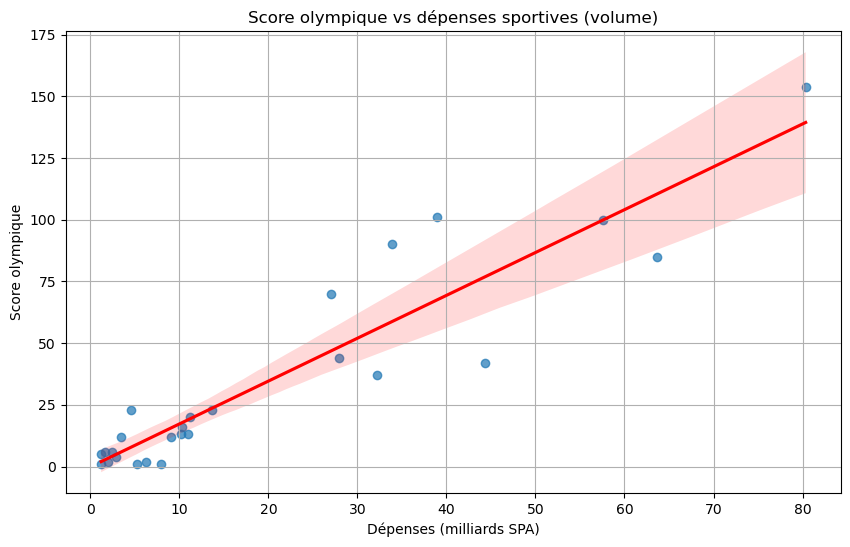

In [174]:
plot_score_vs_spending(
    df,   
)


In [176]:
import statsmodels.api as sm

X = df[['Dépenses_volume']]
X = sm.add_constant(X)
y = df['Score']

model = sm.OLS(y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     150.0
Date:                Mon, 29 Dec 2025   Prob (F-statistic):           8.20e-12
Time:                        22:03:56   Log-Likelihood:                -107.08
No. Observations:                  26   AIC:                             218.2
Df Residuals:                      24   BIC:                             220.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0941      4.117     

In [177]:
import importlib
import Prepro_long3
import pandas as pd
importlib.reload(Prepro_long3)
from Prepro_long3 import prepare_data_long
from Reg3 import run_ols


df_previous = df_Reg

df_long = prepare_data_long(df, df_previous)




In [178]:
import statsmodels.api as sm

# Sélection des colonnes utilisées et suppression des NaN
df_long_simple = df_long[['Score', 'Dépenses_volume', 'score_précédent']].dropna()

# Préparer X et y
X = df_long_simple[['Dépenses_volume', 'score_précédent']]
X = sm.add_constant(X)  # ajoute l'intercept
y = df_long_simple['Score']

# Ajuster le modèle OLS
model_long = sm.OLS(y, X).fit()

# Afficher le résumé
print(model_long.summary())



                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     127.6
Date:                Mon, 29 Dec 2025   Prob (F-statistic):           3.56e-13
Time:                        22:04:02   Log-Likelihood:                -100.43
No. Observations:                  26   AIC:                             206.9
Df Residuals:                      23   BIC:                             210.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.5574      3.278     